In [32]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [34]:
file_path = "/Users/ryan/Downloads/Arratia Materials/Lidar_logs/Log_2025-05-28_10_41_00.txt"

times = []
distances = []
strengths = [] 

fmt = "%H:%M:%S"

with open(file_path, "r") as f:
    for i, line in enumerate(f):
        values = line.strip().split("|")
        if i==0:
            start_time = values[0]
        elapsed = datetime.strptime(values[0],fmt) - datetime.strptime(start_time,fmt)
        times.append(elapsed.total_seconds())
        distances.append(int(re.findall(r"\d+", values[1])[0]))
        strengths.append(int(re.findall(r"\d+", values[2])[0]))
print(len(strengths))



1873


Text(0.5, 1.0, 'Lidar Distance Tracking')

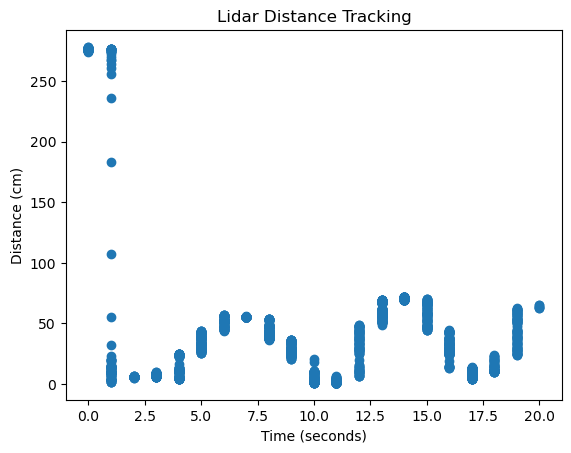

In [37]:
plt.scatter(times, distances)
plt.xlabel("Time (seconds)")
plt.ylabel("Distance (cm)")
plt.title("Lidar Distance Tracking")

Text(0.5, 1.0, 'Lidar Distance Tracking: Average Distances')

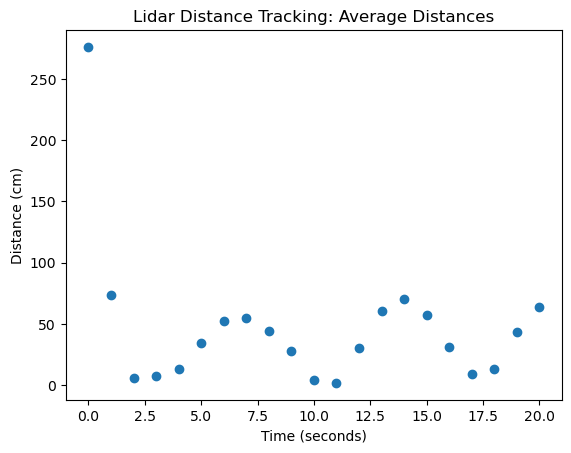

In [45]:
dist_dict = {}
for i,time in enumerate(times):
    if time not in dist_dict.keys():
        dist_dict[time]=[]
    dist_dict[time].append(distances[i])

avg_distances = []
for dist_list in dist_dict.values():
    avg_distances.append(np.mean(dist_list))


plt.scatter(dist_dict.keys(), avg_distances)
plt.xlabel("Time (seconds)")
plt.ylabel("Distance (cm)")
plt.title("Lidar Distance Tracking: Average Distances")